In [29]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [12]:
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    Returns
    new values of the slope and intercept counted from batch.
    """
    y_pred = np.matmul(X, W) + b # predict the value
    error = y - y_pred # count absolute error
    
    # minimize error
    W_new = W + learn_rate * np.matmul(error, X) 
    b_new = b + learn_rate * error.sum()
    
    return W_new, b_new

In [13]:
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    Returns
    regression_coef : array of slopes and intercepts 
    generated by gradient descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef

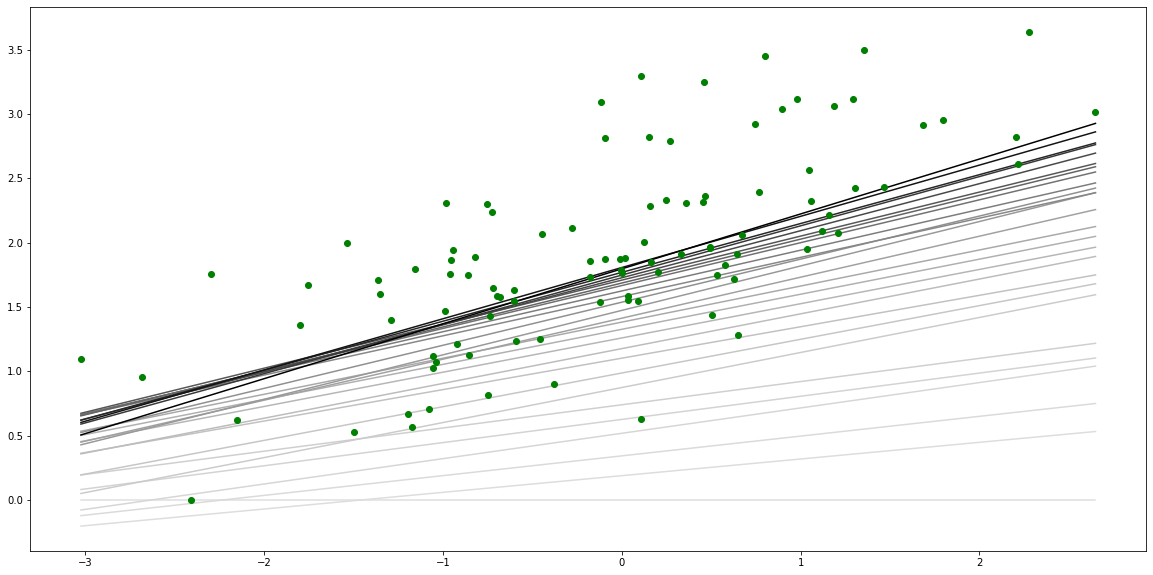

In [28]:
if __name__ == "__main__":
    data = np.loadtxt('data.csv', delimiter = ',')
    X, y = data[:,:-1], data[:,-1]
    regression_coef = miniBatchGD(X, y)
    
    # visualize
    plt.figure(figsize=(20, 10))
    X_min = X.min()
    X_max = X.max()
    counter = len(regression_coef)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color=color)
    plt.scatter(X, y, zorder=3, color='green')
    plt.show()